# 6. Проверка на нормальность #


In [1]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import statsmodels.api as sm

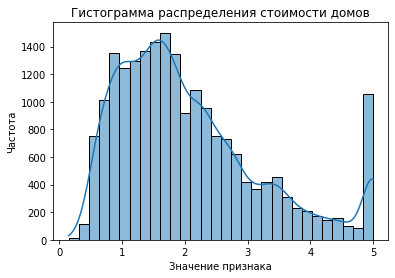

In [2]:
dataset = datasets.fetch_california_housing()
data = dataset.target

ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')
plt.show()

## Квантиль-квантиль график ##

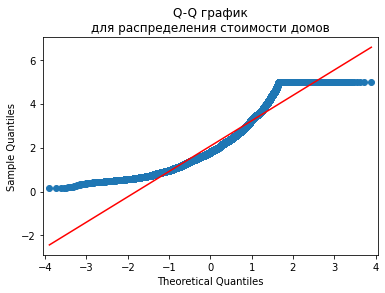

In [3]:
sm.qqplot(data, line='s')
plt.title('Q-Q график\nдля распределения стоимости домов')
plt.show()

## Тест Шапиро-Уилка ##

In [4]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 
# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39,
        36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# p-value = 0.015
# Распределение не нормальное

p-value = 0.015
Распределение не нормальное


###  Задание 6.2 ###

Измерено время, которое необходимо, чтобы оформить заказ в онлайн-магазине. В результате получены следующие значения:

```
12, 8, 9, 10, 11, 12, 7, 12, 2, 10, 3, 9, 18, 4, 11, 13, 13, 17, 14, 3, 10, 2, 2, 7, 14, 8, 20, 5, 7, 10
```

С помощью теста Шапиро — Уилка определить, распределены ли значения нормально. Полученное p-значение, округлённое до двух знаков после точки-разделителя.

***Ответ - 0.41***

In [5]:
alpha = 0.05
data2 = [12, 8, 9, 10, 11, 12, 7, 12, 2, 10,
         3, 9, 18, 4, 11, 13, 13, 17, 14, 3,
         10, 2, 2, 7, 14, 8, 20, 5, 7, 10]
b, p = stats.shapiro(data2)
print('p-value = %.2f' % (p))
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.41
Распределение нормальное


# 7. Параметрические тесты #

## Одновыборочный t-критерий (t-test) ##

In [10]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 
# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39,
        36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
bulk_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу.


## Двухвыборочный t-критерий (t-test) ##

In [11]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 
# загружаем данные
data_zaryad = np.array([41, 38, 40, 46, 40, 46, 41, 44, 43, 39,
                        36, 41, 37, 45, 38, 45, 38, 48, 42, 34])
data_planeta = np.array([40, 39, 42, 46, 41, 46, 42, 45, 44, 42,
                         38, 42, 38, 46, 39, 46, 40, 41, 43, 36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу.


## Однофакторный дисперсионный анализ (ANOVA) ##

In [12]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05
# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39,
                36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43,
                 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41,
                  48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу.


## Парный t-критерий ##

In [13]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 
# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38,
                        36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45,
                         40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями ##

In [14]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35,
                                    32, 34, 42, 48, 43,
                                    41, 39, 35, 34, 52]
                    })
# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



###  Задание 7.3 ###

Компания оптимизировала доставку товаров и хочет узнать, стало ли среднее время доставки меньше 40 минут. Измерили время 20 случайных доставок — оно приведено в минутах и содержится в списке `data`:
```
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
```
Данные распределены нормально.

Выбрать статистический тест, который нужен для ответа на вопрос компании: ***Ответ - Одновыборочный t-критерий***

Провести статистический тест для ответа на вопрос компании. В качестве ответа ввести полученное `p-value`, округлённое до трёх знаков после точки-разделителя.

***Ответ - 0.018***

In [15]:
import scipy.stats as stats

alpha = 0.05 
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39,
        36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

bulk, p = stats.ttest_1samp(data, popmean=40, alternative='less')
print(f'p-value = {p:.3f}')
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.018
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


###  Задание 7.4 ###

Компания хочет узнать, отличается ли время доставки в трёх районах города: Северном, Южном, Восточном. Измерили время 25 случайных доставок в каждом из районов — оно составило в минутах:
```
Северный:
data_north = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

Южный:
data_south = [32, 60, 59, 39, 107, 88, 66, 81, 68, 49, 138, 11, 81, 77, 45, 11, 54, 56, 71, 63, 105, 32, 53, 17, 27]

Восточный:
data_east = [80, 92, 60, 33, 86, 80, 57, 71, 100, 128, 6, 31, 95, 91, 66, 45, 79, 27, 100, 3, 65, 105, 20, 80, 81]
```
Данные распределены нормально.

Выбрать статистический тест, который нужен для ответа на вопрос компании: ***Ответ - Однофакторный дисперсионный анализ (ANOVA)***

Провести статистический тест для ответа на вопрос компании. В качестве ответа ввести полученное `p-value`, округлённое до трёх знаков после точки-разделителя.

***Ответ - 0.002***

In [16]:
import scipy.stats as stats

alpha = 0.05
data_north = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39,
              36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
data_south = [32, 60, 59, 39, 107, 88, 66, 81, 68, 49,
              138, 11, 81, 77, 45, 11, 54, 56, 71, 63,
              105, 32, 53, 17, 27]
data_east = [80, 92, 60, 33, 86, 80, 57, 71, 100, 128,
             6, 31, 95, 91, 66, 45, 79, 27, 100, 3,
             65, 105, 20, 80, 81]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_north, data_south, data_east)
p = result[1]
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
bulk_, p = stats.f_oneway(data_north, data_south, data_east)
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

Тест на равенство дисперсий
p-value = 0.000
Дисперсии не одинаковы, нужно использовать непараметрический тест

Тест на равенство средних
p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### Задание 7.5 ###

Компания провела обучение курьеров и хочет узнать, привело ли это к уменьшению времени доставки. Для 30 курьеров было измерено время доставки до и после обучения и получены следующие данные в минутах:
```
до:
data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]

после:
data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]
```

Выбрать статистический тест, который нужен для ответа на вопрос компании: ***Ответ - Парный t-test***

Провести статистический тест для ответа на вопрос компании. В качестве ответа ввести полученное `p-value`, округлённое до трёх знаков после точки-разделителя.

***Ответ - 0.213***

In [17]:
import scipy.stats as stats
import numpy as np

alpha = 0.05 
data_1 = np.array([21, 19, 25, 18, 32, 10, 26, 25, 35, 26,
                   23, 37, 30, 40, 29, 35, 28, 39, 26, 32,
                   40, 29, 44, 34, 37, 12, 37, 23, 33, 42])
data_2 = np.array([23, 17, 41, 25, 9, 22, 18, 42, 27, 29,
                   30, 23, 38, 14, 27, 29, 28, 18, 19, 26,
                   29, 25, 32, 26, 47, 50, 30, 30, 36, 16])

# тест
bulk_, p = stats.ttest_rel(data_2, data_1, alternative='less')
print(f'p-value = {p:.3f}')
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.213
p-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу.


# 8. Непараметрические тесты #

## Критерий знаков (для одной группы) ##

In [18]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 
# загружаем данные
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53,
        53, 55, 42, 41, 59, 43, 47, 60, 50, 57,
        59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

# проводим тест
bulk_, p = sign_test(data, 60)
print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## U-критерий Манна-Уитни ##

In [19]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 
# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53,
                 53, 55, 42, 41, 59, 43, 47, 60, 50, 57,
                 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68,
                 63, 68, 62, 65, 77, 66, 67, 62, 60, 74,
                 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
bulk_, p = stats.mannwhitneyu(data_chat_bot, data_operator)
print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## Критерий Уилкоксона ##

In [20]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 
# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76,
                 79, 99, 82, 85, 93, 78, 76, 87, 73, 72,
                 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115,
                 100, 129, 120, 129, 117, 125, 112, 105, 128, 107,
                 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## Критерий Краскела-Уоллиса ##

In [21]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 
# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102,
              98, 97, 104, 100, 94, 94, 98, 103, 95, 93,
              118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90,
               99, 93, 91, 91, 119, 95, 110, 108, 117, 99,
               100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93,
             102, 109, 98, 99, 100, 113, 91, 96, 119, 96,
             95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
bulk_, p = stats.kruskal(data_basic, data_silver, data_gold)
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу.


## Критерий Фридмана ##

In [22]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 
# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120,
              92, 103, 120, 100, 110, 106, 112, 99, 118, 113,
              102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93,
               89, 78, 90, 73, 83, 73, 84, 90, 75, 75,
               86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77,
             84, 81, 89, 68, 87, 70, 70, 61, 82, 79,
             60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
bulk_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)
print(f'p-value = {p:.3f}'.format(p))
# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


###  Задание 8.3 ###

Компания обновила интерфейс для обработки заявок и хочет узнать, привело ли это к увеличению количества обработанных заявок. Для 30 сотрудников измерили число обработанных заявок до и после обновления интерфейса и получили следующие данные:
```
До:
data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]

После:
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]
```
Данные не распределены по нормальному закону.

Выбрать статистический тест, который нужен для ответа на вопрос компании: ***Ответ - Критерий Уилкоксона***

Провести статистический тест для ответа на вопрос компании. В качестве ответа ввести полученное `p-value`, округлённое до трёх знаков после точки-разделителя.

***Ответ - 0.742***

In [24]:
import scipy.stats as stats

alpha = 0.05
data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35,
               42, 52, 38, 33, 40, 43, 51, 38, 36, 47,
               42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40,
              32, 41, 48, 36, 37, 39, 37, 42, 46, 38,
              42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

bulk_, p = stats.wilcoxon(data_after, data_before, alternative = 'greater')
print(f'p-value = {p:.3f}')
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.742
p-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу.


###  Задание 8.4 ###

Компания обновила интерфейс для обработки заявок и хочет узнать, стало ли среднее количество обработанных за день заявок равно 75. На протяжении 30 дней замеряли количество обработанных заявок — оно получилось следующим:
```
data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]
```
Данные не распределены по нормальному закону.

Выбрать статистический тест, который нужен для ответа на вопрос компании: ***Ответ - Критерий знаков (для одной группы)***

Провести статистический тест для ответа на вопрос компании. В качестве ответа ввести полученное `p-value`, округлённое до трёх знаков после точки-разделителя.

***Ответ - 0.136***

In [25]:
from statsmodels.stats.descriptivestats import sign_test

alpha = 0.05 
data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81,
        88, 74, 74, 79, 78, 73, 89, 82, 77, 77,
        88, 75, 80, 88, 72, 84, 88, 74, 74, 78]
avg_value = 75
# тест
bulk_, p = sign_test(data, avg_value)
print(f'p-value = {p:.3f}')
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.136
p-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу.


###  Задание 8.5 ###

Компания хочет узнать, отличается ли количество обработанных за день заявок по категориям "Тарифы", "Спецпредложения", "Техподдержка". На протяжении 25 дней измеряли количество обработанных заявок в каждой из категорий оно составило:
```
"Тарифы":
data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]

"Спецпредложения":
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]

"Техподдержка":
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]
```
Выбрать статистический тест, который нужен для ответа на вопрос компании: ***Ответ - Критерий Краскера-Уоллиса***

Провести статистический тест для ответа на вопрос компании. В качестве ответа ввести полученное `p-value`, округлённое до трёх знаков после точки-разделителя.

***Ответ - 0.000***

In [26]:
import scipy.stats as stats

alpha = 0.05 
data_1 = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63,
          62, 59, 61, 61, 62, 57, 55, 60, 56, 62,
          64, 56, 62, 62, 65]
data_2 = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60,
          58, 61, 59, 63, 62, 63, 59, 64, 63, 58,
          61, 61, 62, 55, 61]
data_3 = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69,
          64, 61, 69, 69, 62, 68, 65, 69, 62, 67,
          63, 69, 63, 67, 61]

# тест
bulk_, p = stats.kruskal(data_1, data_2, data_3)
print(f'p-value = {p:.3f}')
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


# 9. Статистические тесты для категориальных признаков #

## Критерий $\chi^2$ (хи-квадрат) ##

In [27]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 
data = pd.read_csv('data/cat_variables_tarif_children_NEW.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

# проводим тест
bulk1_, p, bulk2_, bulk3_ = stats.chi2_contingency(table)
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу.


## Критерий Мак-Немара ##

In [28]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 
data = pd.read_csv('data/cat_variables_usage_NEW.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])

# проводим тест
res = mcnemar(table)
# извлекаем значение p-value из результатов теста
p = res.pvalue
print(f'p-value = {p:.3f}')
# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


###  Задание 9.2 ###

Компания собирает обратную связь от клиентов. Чтобы увеличить количество ответов, переработали форму обратной связи. У 30 случайных клиентов запросили обратную связь, используя сначала старую, а затем новую форму. Наличие обратной связи обозначили как 'Есть', отсутствие&nbsp;&mdash; как 'Нет'. Полученные данные в виде pandas DataFrame data:
```
data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']], columns=['Старая форма', 'Новая форма'])
```
Выбрать статистический тест, который нужен для ответа на вопрос компании: ***Ответ - Критерий Мак-Немара***

Провести статистический тест для ответа на вопрос компании. В качестве ответа ввести полученное `p-value`, округлённое до трёх знаков после точки-разделителя.

***Ответ - 0.035***

In [30]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

alpha = 0.05
data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'],
                     ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'],
                     ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'],
                     ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'],
                     ['Нет', 'Нет'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'],
                     ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'],
                     ['Есть', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'],
                     ['Нет', 'Есть'], ['Нет', 'Нет']],
                    columns=['Старая форма', 'Новая форма'])
display(data.head())
table = pd.crosstab(data['Старая форма'], data['Новая форма'])
display(table)

res = mcnemar(table)
p = res.pvalue
print(f'p-value = {p:.3f}')
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. Нет оснований отвергнуть нулевую гипотезу.')

,Старая форма,Новая форма
0,Есть,Есть
1,Есть,Нет
2,Нет,Есть
3,Нет,Есть
4,Нет,Нет


Новая форма,Есть,Нет
Старая форма,,
Есть,7,3
Нет,12,8


p-value = 0.035
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
